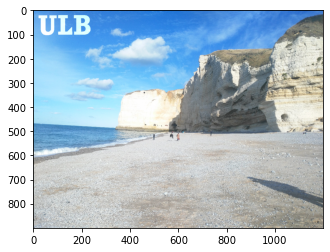

In [4]:
%matplotlib inline
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt
import numpy as np
from skimage.color import rgb2hsv, gray2rgb

wtm = imread("watermark.png")
target = imread("etretat.jpg")


color = gray2rgb(wtm) #used to get the white pixels

### NOT optimal ### Analyses pixel where the watermark is set and checks its value (dark or bright) and give BOOL

def lum(im, y, x):
    imHSV = rgb2hsv(im)
    bool = True
    if imHSV[y,x,2] > 0.7 and imHSV[y,x,1] < 0.02:
        bool = False
    return bool


###This function detects the white pixel in WATERMARK.png and brightens the target's pixels at the specific position ####

def wtm(im, age, posy, posx, intens) : # 0 : transparent // 255 : opac
    lumi = lum(im, posy, posx)
    for y in range(age.shape[0]):
        for x in range(age.shape[1]):
            for i in range(3):
                if age[y,x,i] == 255:
                    if lumi == True:
                        if im[posy + y,posx + x,i] + intens < 255 :
                            im[posy + y,posx + x,i] += intens
                        else :
                            im[posy + y,posx + x,i] = 255
                    else :
                        if im[posy + y,posx + x,i] - intens > 0 :
                            im[posy + y,posx + x,i] -= intens
                        else :
                            im[posy + y,posx + x,i] = 0
                                   
    return im

#########################


test = wtm(target, color, 20, 20, 150)

plt.figure()
plt.imshow(test)
plt.show()

imsave("projets.png", test)